## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/IPD/code/audio/wav2vecAndFeatureAndLabel.csv', index_col='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,772,773,774,775,776,777,778,779,780,label
0,-0.041823,0.002920,-0.044766,-0.057243,0.101603,-0.048774,0.040614,-0.040836,0.059322,-0.216457,...,0.257575,0.187818,0.088702,0.060642,8825.233502,1323.673214,1.441300,-62.506859,98.441387,1.0
1,0.010185,-0.005375,-0.072192,-0.063968,0.116239,-0.105872,0.034761,-0.033816,0.098582,-0.233236,...,0.138716,0.139052,0.068526,0.042545,6412.378772,2409.543056,0.810636,-36.677607,88.585121,1.0
2,0.009155,-0.010324,-0.122451,-0.074097,0.062079,-0.086227,0.039490,-0.034247,0.107387,-0.223692,...,0.072548,0.074697,0.037494,0.026806,3655.643439,2759.555598,0.971251,-61.680579,97.244589,1.0
3,-0.011689,-0.053456,-0.128466,-0.106791,0.116320,-0.030688,-0.011577,-0.031152,0.161718,-0.101874,...,0.166019,0.177654,0.066600,0.068555,5721.109480,3701.307650,1.893939,-107.198889,106.638173,1.0
4,-0.008956,-0.002147,-0.127113,-0.131215,0.116599,-0.099973,0.010518,-0.026963,0.098702,-0.129256,...,0.117746,0.140863,0.076510,0.058947,4075.818650,3445.456428,2.245509,-77.738639,107.043610,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Columns: 782 entries, 0 to label
dtypes: float64(782)
memory usage: 11.9 MB


In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
777,0
778,0
779,0
780,0


In [ ]:
df['label'].value_counts()

,count
label,
1.0,1354
0.0,646


## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1600, 781)
Testing set size: (400, 781)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training labels distribution:", pd.Series(y_train).value_counts())
print("Resampled training labels distribution:", pd.Series(y_train_resampled).value_counts())

Original training labels distribution: 1.0    1083
0.0     517
Name: count, dtype: int64
Resampled training labels distribution: 0.0    1083
1.0    1083
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

print("Explained variance by components:", pca.explained_variance_ratio_)

Explained variance by components: [0.3211888  0.08279232 0.05371366 0.03628486 0.03262382 0.02819028
 0.02553314 0.02323983 0.02135775 0.01845554 0.0173123  0.01606451
 0.01458487 0.01332192 0.01263258 0.01195555 0.01105483 0.01048521
 0.00996611 0.00960099 0.00911659 0.00775035 0.00762665 0.00721051
 0.00663349 0.00642701 0.00600821 0.00524071 0.00503858 0.00495973
 0.00454631 0.00423814 0.00396895 0.00389364 0.00366055 0.00341297
 0.00339033 0.00330295 0.0031749  0.0031125  0.00284062 0.00271111
 0.00250012 0.00247912 0.00234816 0.00222685 0.00217018 0.00210569
 0.0020093  0.00194743 0.00185015 0.00178245 0.00169878 0.00169244
 0.00162964 0.00162502 0.00152057 0.00149731 0.00148915 0.00144102
 0.00141131 0.00140162 0.00133347 0.00132102 0.00128174 0.00125899
 0.00121297 0.00117597 0.00117171 0.00112869 0.00112194 0.00109481
 0.00104731 0.0010114  0.00100366 0.0009818  0.00097047 0.0009547
 0.00093622 0.00091292 0.0008916  0.00089073 0.00086518 0.00084441
 0.00083765 0.00082706 0.0008

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train_resampled)

importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("Top 10 important features:", sorted_indices[:10])

Top 10 important features: [46  0 38 58 53 42 75 71 60 82]


## Baseline Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.57
AUC-ROC: 0.5483852512943734

Classification Report:
               precision    recall  f1-score   support

         0.0       0.35      0.37      0.36       129
         1.0       0.69      0.66      0.68       271

    accuracy                           0.57       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.58      0.57      0.57       400



Confusion Matrix:
 [[ 48  81]
 [ 91 180]]


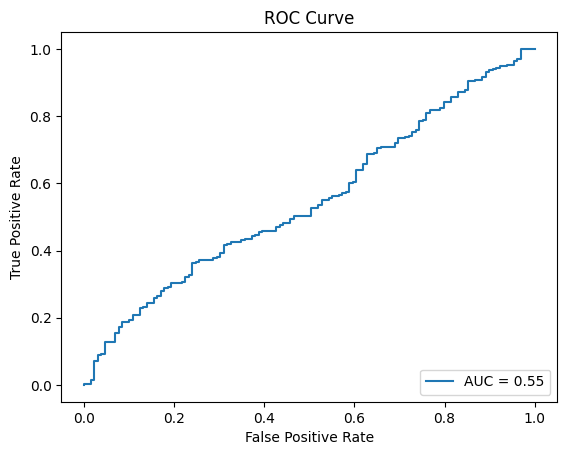

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The model is biased toward class 1, performing poorly on class 0. Logistic Regression does not capture the non-linear patterns in the data.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.37      0.28      0.32       129
         1.0       0.69      0.77      0.73       271

    accuracy                           0.61       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.59      0.61      0.60       400

Random Forest AUC-ROC: 0.5366143196315684


Random Forest slightly outperforms Logistic Regression but still struggles with class 0, indicating an imbalance in prediction.

### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, y_proba_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.37      0.15      0.21       129
         1.0       0.68      0.88      0.77       271

    accuracy                           0.65       400
   macro avg       0.53      0.51      0.49       400
weighted avg       0.58      0.65      0.59       400

XGBoost AUC-ROC: 0.5560513744672331


XGBoost did not significantly improve results compared to Random Forest, likely due to limited tuning or insufficient representation of class 0 in training.

### Grid Search CV Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.60375


Tuning slightly improves accuracy, but the fundamental limitations of Logistic Regression persist.

### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=20, batch_size=32, verbose=1
)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5085 - loss: 0.8986 - val_accuracy: 0.6275 - val_loss: 0.6796
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5989 - loss: 0.7182 - val_accuracy: 0.5900 - val_loss: 0.6832
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6958 - loss: 0.5885 - val_accuracy: 0.4800 - val_loss: 0.7943
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6964 - loss: 0.6126 - val_accuracy: 0.5450 - val_loss: 0.7180
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7146 - loss: 0.5531 - val_accuracy: 0.6275 - val_loss: 0.6851
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7278 - loss: 0.5248 - val_accuracy: 0.5650 - val_loss: 0.7597
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7408 - loss: 0.5072 - val_accuracy: 0.5975 - val_loss: 0.7358
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7959 - loss: 0.4431 - val_accuracy: 0.5725 - val_lo

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.5900


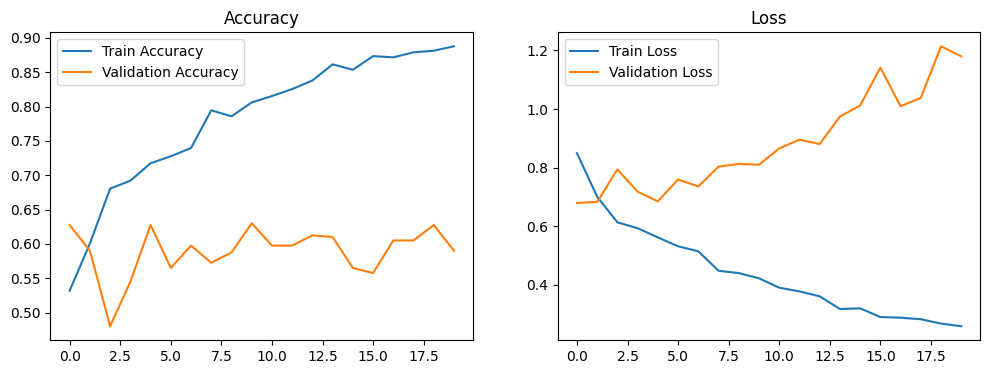

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

While training accuracy improves steadily, validation performance does not generalize well. The model might require additional regularization or fine-tuning.

### Optuna Neural Network

In [ ]:
!pip install --upgrade --quiet optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def objective(trial):
    n_units = trial.suggest_int('n_units', 128, 512)
    n_layers = trial.suggest_int('n_layers', 1, 3)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train_resampled.shape[1],)))
    model.add(Dropout(dropout_rate))

    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train_resampled, y_train_resampled,
              validation_data=(X_test, y_test),
              epochs=10, batch_size=32, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-12-08 11:21:33,061] A new study created in memory with name: no-name-4fa80d6a-1461-41de-ad78-74e1d9946503
[I 2024-12-08 11:21:50,516] Trial 0 finished with value: 0.5299999713897705 and parameters: {'n_units': 339, 'n_layers': 2, 'dropout_rate': 0.25808917934503445, 'learning_rate': 0.005857409429550555}. Best is trial 0 with value: 0.5299999713897705.
[I 2024-12-08 11:22:02,770] Trial 1 finished with value: 0.5950000286102295 and parameters: {'n_units': 352, 'n_layers': 1, 'dropout_rate': 0.19326535100737063, 'learning_rate': 0.0009623134797876845}. Best is trial 1 with value: 0.5950000286102295.
[I 2024-12-08 11:22:13,775] Trial 2 finished with value: 0.5625 and parameters: {'n_units': 386, 'n_layers': 1, 'dropout_rate': 0.35685359993396915, 'learning_rate': 0.00020639268339474215}. Best is trial 1 with value: 0.5950000286102295.
[I 2024-12-08 11:22:22,869] Trial 3 finished with value: 0.6000000238418579 and parameters: {'n_units': 456, 'n_layers': 1, 'dropout_rate': 0.108626

Best hyperparameters: {'n_units': 511, 'n_layers': 3, 'dropout_rate': 0.1835570095565665, 'learning_rate': 0.008824804607434188}
Best accuracy: 0.6775000095367432


In [ ]:
best_params = study.best_params

final_model = Sequential()
final_model.add(Dense(best_params['n_units'], activation='relu', input_shape=(X_train_resampled.shape[1],)))
final_model.add(Dropout(best_params['dropout_rate']))

for _ in range(best_params['n_layers'] - 1):
    final_model.add(Dense(best_params['n_units'], activation='relu'))
    final_model.add(Dropout(best_params['dropout_rate']))

final_model.add(Dense(1, activation='sigmoid'))

In [ ]:
final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
final_model.fit(X_train_resampled, y_train_resampled,
                validation_data=(X_test, y_test),
                epochs=20, batch_size=32, verbose=1)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5071 - loss: 3.6127 - val_accuracy: 0.5150 - val_loss: 0.7232
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5179 - loss: 0.7084 - val_accuracy: 0.4000 - val_loss: 0.7226
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5310 - loss: 0.6983 - val_accuracy: 0.4225 - val_loss: 0.7128
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5295 - loss: 0.6847 - val_accuracy: 0.5150 - val_loss: 0.6884
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5694 - loss: 0.6833 - val_accuracy: 0.5625 - val_loss: 0.6792
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5232 - loss: 0.6911 - val_accuracy: 0.5775 - val_loss: 0.6695
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5912 - loss: 0.6663 - val_accuracy: 0.3500 - val_loss: 0.7459
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5525 - loss: 0.6962 - val_accuracy: 0.3450 - v

Optuna-tuned NN shows noticeable improvement in validation accuracy compared to the baseline NN, suggesting it better captures patterns in the dataset.

### Key Takeaways

**1. Class Imbalance:**

All models struggle with class 0 (non-hate), as evident from low precision and recall. Addressing this imbalance is critical, perhaps through:

*   Oversampling/undersampling.
*   Class-weighted losses.

**2. Feature Non-Linearity:**

Models like XGBoost and Neural Networks performed marginally better, hinting that feature interactions are non-linear. Further exploration of model architectures or embeddings could help.

**3. Neural Network Optimization:**

The Optuna-tuned neural network showed the best performance but still lacks generalization. Techniques to try:

*   Early stopping to avoid overfitting.
*   Data augmentation (e.g., pitch shifting, noise injection for audio).
*   Larger batch sizes or dropout adjustments.

**4. Feature Engineering:**

Beyond wav2vec, consider feature reduction or representation learning techniques like PCA or embeddings.

**5. Next Steps:**

*   Experiment with imbalanced-learn techniques (SMOTE, ADASYN).
*   Consider ensembles like stacked models combining NN and tree-based methods.
*   Evaluate metrics like precision-recall AUC for imbalanced datasets.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "Logistic Regression",
    "Random Forest",
    "XGBoost",
    "GridSearchCV LR",
    "Neural Network",
    "Optuna-Tuned NN"
]

accuracy = [57.75, 61, 58, 60.37, 55.75, 67.75]
auc_roc = [0.54, 0.53, 0.52, None, None, None]
f1_scores_class_0 = [0.27, 0.32, 0.26, None, None, None]
f1_scores_class_1 = [0.70, 0.73, 0.70, None, None, None]

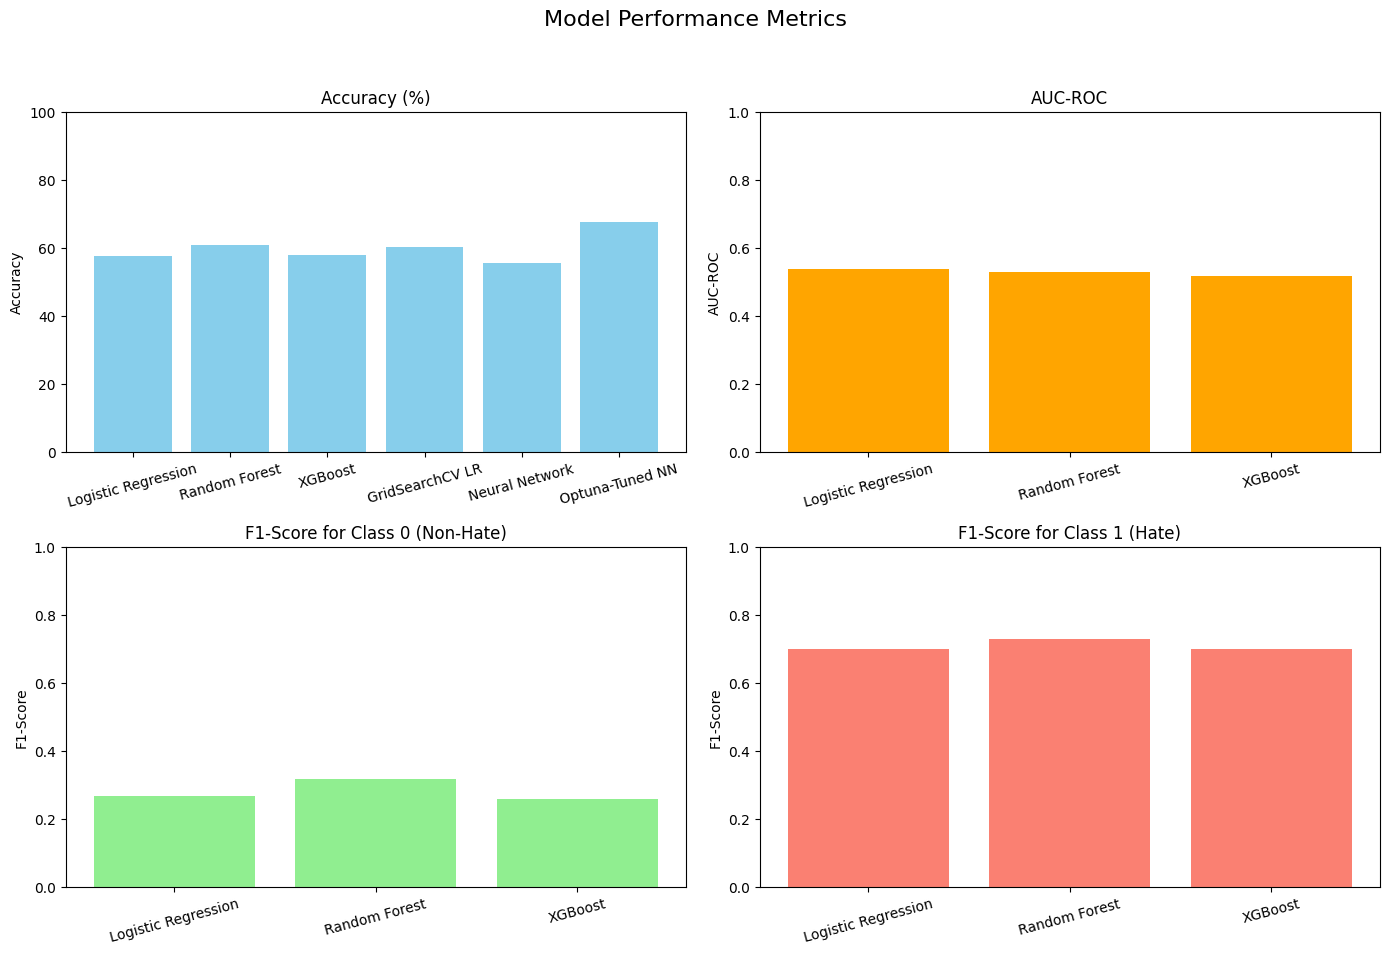

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics', fontsize=16)

axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy (%)')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 100)
axs[0, 0].tick_params(axis='x', rotation=15)

axs[0, 1].bar(models[:3], auc_roc[:3], color='orange')
axs[0, 1].set_title('AUC-ROC')
axs[0, 1].set_ylabel('AUC-ROC')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].tick_params(axis='x', rotation=15)

axs[1, 0].bar(models[:3], f1_scores_class_0[:3], color='lightgreen')
axs[1, 0].set_title('F1-Score for Class 0 (Non-Hate)')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].tick_params(axis='x', rotation=15)

axs[1, 1].bar(models[:3], f1_scores_class_1[:3], color='salmon')
axs[1, 1].set_title('F1-Score for Class 1 (Hate)')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Improved Models

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_deep = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=500, random_state=42)

In [ ]:
mlp_deep.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=500, random_state=42)

In [ ]:
mlp_deep_accuracy = mlp_deep.score(X_test, y_test)
print(f"Test Accuracy for Deep NN: {mlp_deep_accuracy * 100:.2f}%")

Test Accuracy for Deep NN: 58.25%


### Advanced Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train_padded = pad_sequences(X_train_resampled, padding='post', maxlen=500)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train_padded.shape[1]),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_padded, y_train_resampled, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5578 - loss: 0.7267 - val_accuracy: 0.1106 - val_loss: 0.8571
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6154 - loss: 0.6520 - val_accuracy: 0.0783 - val_loss: 0.8940
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6645 - loss: 0.6261 - val_accuracy: 0.1544 - val_loss: 0.9284
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6937 - loss: 0.5874 - val_accuracy: 0.3180 - val_loss: 0.8022
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7098 - loss: 0.5757 - val_accuracy: 0.4885 - val_loss: 0.7043
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7675 - loss: 0.5127 - val_accuracy: 0.5760 - val_loss: 0.8058
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7792 - loss: 0.4914 - val_accuracy: 0.5461 - val_loss: 0.7063
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8128 - loss: 0.4127 - val_accuracy: 0.6705 - v

In [ ]:
X_test_padded = pad_sequences(X_test, padding='post', maxlen=500)
test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy with Early Stopping: {test_accuracy[1] * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 1.7916 
Test Accuracy with Early Stopping: 57.50%
